## **MAGPIE: an interactive tool for visualizing and analyzing many simultaneous protein interactions with a binding partner**

**What is this tool?**
MAGPIE is an online tool hosted on Google Colab that generates 3D visualizations for sets of protein binders interacting with one target ligand (which can be a protein or a small molecule). It also produces sequence logo-style amino acid (AA) frequency graphs. In the AA frequency graphs, the user chooses target ligand positions on the fly, and the size of each binder AA is based on the frequency that it appears in the protein complex dataset within a user-defined distance from the chosen target ligand position(s). The distance is calculated using the alpha carbon positions between protein interfaces, or all heavy atoms in the case of ligands. MAGPIE's 3D visualizer plots the entire target structure, and highlights the residues within a specified distance constraint. There are two options for coloring the interacting residues based on [Amino colour](http://acces.ens-lyon.fr/biotic/rastop/help/colour.htm#aminocolours) and [Shapely colour](http://acces.ens-lyon.fr/biotic/rastop/help/colour.htm#shapelycolours). If you don't mind that your data is semi-public, or have <1000 input PDB files, it may be more convenient to compute on the cloud with [the Google CoLab version](https://colab.research.google.com/github/glasgowlab/MAGPIE/blob/GoogleColab/MAGPIE_COLAB.ipynb).

**Required Inputs:**
- PDB files: these should be aligned on the target ligands. Two examples are provided on GitHub, one for protein-protein interactions and one for small molecule-protein interactions.
- Target chain ID from PDB: the program uses the first file in the directory to upload the target ligand structure.
- Protein binder chain ID from PDB: this chain identifier must be the same across all PDB files.
- Target type: indicate whether the target ligand is a small molecule or a protein.
- Target residue index (for protein ligands) or unique atom names (for small molecule ligands): provide the target residue indices for proteins or unique atom names for small molecules. Alternatively, you can input 'all' to consider all AAs/heavy atoms.

**Usage:**
Please execute the cells in numerical order. If you wish to load a different dataset, start from the upload step to reload the new data.


## **1. Run required packages ↓**

##  **2. Upload data, and process**

run next cell to input path to directory containing all PDB files:

Example usages:

Type either **'Protein Example'** or **'Ligand Example'** to run example sets.


In [1]:
!pip install Logomaker
!pip install numpy == 1.18.5
import pandas as pd
import sequence_logo_main
import helper_functions
import os
import glob

zsh:1: = not found


In [2]:
pdb_files = input("Enter path to files: ")
pdb_files = glob.glob(f"{pdb_files}/*.pdb")
print(pdb_files)

Enter path to files: Ligand Example
['Ligand Example/8a9n.pdb', 'Ligand Example/6nds.pdb', 'Ligand Example/6p7k.pdb', 'Ligand Example/7ed0.pdb', 'Ligand Example/7b4r.pdb', 'Ligand Example/6he2.pdb', 'Ligand Example/6zzk.pdb', 'Ligand Example/6ct5.pdb', 'Ligand Example/6qwu.pdb', 'Ligand Example/7xwv.pdb', 'Ligand Example/6as5.pdb', 'Ligand Example/6arb.pdb', 'Ligand Example/5xuk.pdb', 'Ligand Example/7s3u.pdb', 'Ligand Example/7uul.pdb', 'Ligand Example/6b3t.pdb', 'Ligand Example/7bcz.pdb', 'Ligand Example/6be0.pdb', 'Ligand Example/6j1e.pdb', 'Ligand Example/7n8e.pdb']


## 3. Select target and binding chains.
Select target chain, binding chain, select whether the target is a ligand or protein, atom names (if ligand) or residue index (if protein) to visualize, separate by commas.

You can also type 'all' to plot all residues or atoms.

**Example usage:**
- For protein example use A for target chain and B for binding chain.
- For ligand example use X for target chain and A for binding chain. Use is_ligand function





In [3]:
target_chain = input("Target chain: ")
binding_chain = input("Binding chain: ")
to_plot = input("which residues or atoms to plot (type 'all' to see entire structure): ")
is_ligand = input("Is ligand?: (True or False): ")
distance = int(input("How many Å from target to graph?: " ))
if is_ligand == "True":
    is_ligand = True
else:
    is_ligand = False

if to_plot == "all":
  plot_list = "all"

else:
    if is_ligand:
      plot_list = [str(x) for x in to_plot.split(",")]
    else:
      plot_list =[int(x) for x in to_plot.split(",")]

Target chain: X
Binding chain: A
which residues or atoms to plot (type 'all' to see entire structure): all
Is ligand?: (True or False): True
How many Å from target to graph?: 5


In [4]:
from matplotlib.pyplot import plot
df_target,df_binder = sequence_logo_main.plot(pdb_files, target_chain,binding_chain,is_ligand,plot_list, distance)

## **5. Select residues or atoms to generate sequence logos.**
Enter the residue number or carbon names to graph and separated by a commas.
If there are no residues within the given range, next cell will not execute.


In [5]:
sequence_logo_targets = input("Residues to graph: ")

if is_ligand:
  plot_list = [str(x) for x in sequence_logo_targets.split(",")]
else:
  plot_list =[int(x) for x in sequence_logo_targets.split(",")]


Residues to graph: O2B,O9A,O8A,S1P


##### **6.  Generate sequence logos**
Select if you'd like to only see the combained logo.

Only combined logo? (True or False): False
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


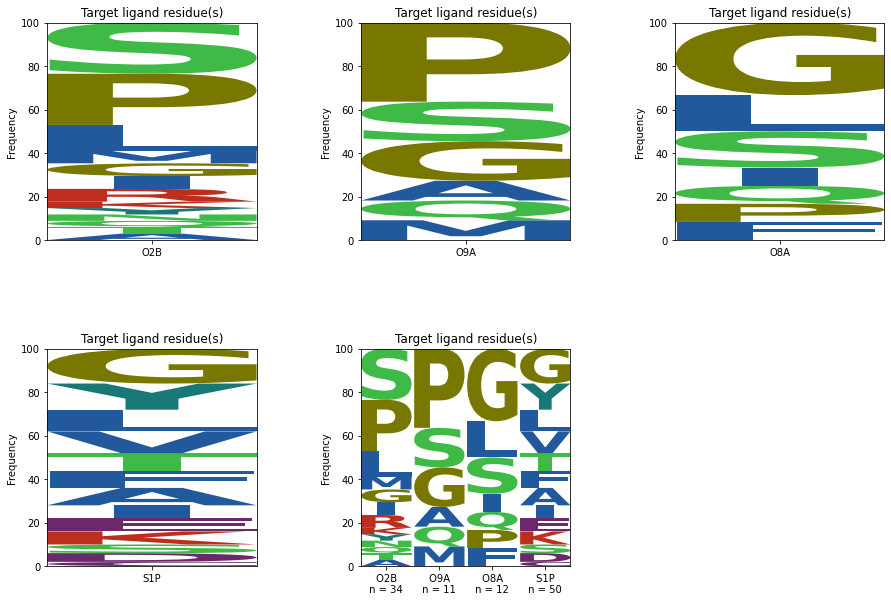

In [6]:

combined = input("Only combined logo? (True or False): ")
if combined == 'True':
    combined = True
else: 
    combined = False
sequence_logo_main.sequence_logos(df_target,df_binder, plot_list, is_ligand,combined, distance)
